In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd/content/drive/MyDrive/train

/content/drive/MyDrive/train


In [ ]:
ls

갈비구이/  계란후라이/  꿀떡/      떡국_만두국/  삼겹살/      유부초밥/  주먹밥/
갈치구이/  고등어구이/  누룽지/    무국/         새우볶음밥/  육개장/    콩나물국/
감자전/    곱창구이/    닭갈비/    미역국/       생선전/      잡곡밥/    파전/
경단/      김밥/        더덕구이/  북엇국/       송편/        장어구이/  호박전/
계란국/    김치볶음밥/  동그랑땡/  불고기/       시래기국/    조개구이/  황태구이/
계란말이/  김치전/      떡갈비/    비빔밥/       알밥/        조기구이/  훈제오리/


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import torchvision.models as models
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import os
import unicodedata
import matplotlib.image as mpimg
from torch.utils.data import DataLoader
import natsort
from torchvision import models
import torch.nn.functional as F
from torchsummary import summary
import warnings
import time

In [ ]:
# CUDA 사용 가능 여부 확인 및 디바이스 설정
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 데이터셋 경로 설정
data_root = "/content/drive/MyDrive"
train_dir = os.path.join(data_root, "train")
val_dir = os.path.join(data_root, "val")

In [ ]:
# 이미지 전처리 및 데이터셋 설정
transform = transforms.Compose([transforms.Resize((224, 224)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

train_dataset = ImageFolder(train_dir, transform=transform)
val_dataset = ImageFolder(val_dir, transform=transform)

# 데이터로더 설정
batch_size = 16
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
menu_folders = os.listdir(train_dir)
menu_folders = natsort.natsorted(menu_folders)
def imshow(img):
    img = img / 2 + 0.5  #unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{menu_folders[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
!sudo apt-get install -y fonts-nanum*

In [ ]:
import matplotlib.font_manager as fm

# 나눔 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

plt.rcParams['font.family'] = 'NanumGothic'  # 폰트 패밀리 이름 (폰트 파일명과 동일해야 함)
plt.rcParams['font.size'] = 12

In [ ]:
plt.figure(figsize=(15, 15))

for i, trainfolder in enumerate(menu_folders):
    trainmenu_path = os.path.join(train_dir, trainfolder)
    imgfiles = os.listdir(trainmenu_path)

    for j, imgfile in enumerate(imgfiles[:1]):  # Take 1 image from each folder
        imgpath = os.path.join(trainmenu_path, imgfile)
        img = mpimg.imread(imgpath)

        name = unicodedata.normalize('NFC', trainfolder)  # Normalize the folder name
        plt.subplot(7, 7, i + 1)
        plt.imshow(img)
        plt.title(name)
        plt.axis('off')

plt.show()


In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# 모델 정의 (ResNet-18)
resnet18 = models.resnet18(pretrained=False)

# 마지막 Fully Connected Layer 변경
num_classes = 42  # 클래스 수
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)
# 모델을 GPU로 이동
device = 'cuda' if torch.cuda.is_available() else 'cpu'
resnet18.to(device)

In [ ]:
# Loss 및 Optimizer 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet18.parameters(), lr=0.01, momentum=0.9)

In [ ]:
# 모델 저장 코드
model_save_path = '/content/drive/MyDrive/model_path/mission1.pt'

In [ ]:
# 초기 모델 학습
# Training loop
num_epochs = 50
save_epochs = 1

for epoch in range(num_epochs):
    resnet18.train()
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 500 == 499:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # 학습이 완료된 후 모델 저장
    if (epoch + 1) % save_epochs == 0:
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': resnet18.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss.item(),
        }
        torch.save(checkpoint, model_save_path)

"\n# 초기 모델 학습\n# Training loop\nnum_epochs = 50\nsave_epochs = 1\n\nfor epoch in range(num_epochs):\n    resnet18.train()\n    running_loss = 0.0\n\n    for i, data in enumerate(trainloader, 0):\n        inputs, labels = data[0].to(device), data[1].to(device)\n\n        optimizer.zero_grad()\n\n        outputs = resnet18(inputs)\n        loss = criterion(outputs, labels)\n        loss.backward()\n        optimizer.step()\n\n        running_loss += loss.item()\n        if i % 500 == 499:\n            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')\n            running_loss = 0.0\n\n    # 학습이 완료된 후 모델 저장\n    if (epoch + 1) % save_epochs == 0:\n        checkpoint = {\n            'epoch': epoch + 1,\n            'model_state_dict': resnet18.state_dict(),\n            'optimizer_state_dict': optimizer.state_dict(),\n            'loss': loss.item(),\n        }\n        torch.save(checkpoint, model_save_path)\n"

학습된 모델을 불러온 후 이어서 학습

In [ ]:
# 모델 저장 코드
model_load_path = '/content/drive/MyDrive/dcc_model.pth'
model_save_path = '/content/drive/MyDrive/model_path/mission1.pt'

In [ ]:
#모델 불러온 후 이어서 학습
# 모델 불러오기
checkpoint = torch.load(model_load_path)
resnet18.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epochs = checkpoint['epoch']
loss = checkpoint['loss']

Epoch 31, Batch 500, Loss: 0.057
Epoch 31, Batch 1000, Loss: 0.050
Epoch 31, Batch 1500, Loss: 0.082
Epoch 31, Batch 2000, Loss: 0.078
Validation Accuracy after 31 epochs: 70.22%
Epoch 32, Batch 500, Loss: 0.053
Epoch 32, Batch 1000, Loss: 0.071
Epoch 32, Batch 1500, Loss: 0.059
Epoch 32, Batch 2000, Loss: 0.050
Validation Accuracy after 32 epochs: 69.70%
Epoch 33, Batch 500, Loss: 0.034
Epoch 33, Batch 1000, Loss: 0.038
Epoch 33, Batch 1500, Loss: 0.044
Epoch 33, Batch 2000, Loss: 0.046
Validation Accuracy after 33 epochs: 68.60%
Epoch 34, Batch 500, Loss: 0.055
Epoch 34, Batch 1000, Loss: 0.048
Epoch 34, Batch 1500, Loss: 0.029
Epoch 34, Batch 2000, Loss: 0.044
Validation Accuracy after 34 epochs: 69.58%
Epoch 35, Batch 500, Loss: 0.051
Epoch 35, Batch 1000, Loss: 0.057
Epoch 35, Batch 1500, Loss: 0.048
Epoch 35, Batch 2000, Loss: 0.061
Validation Accuracy after 35 epochs: 70.08%
Epoch 36, Batch 500, Loss: 0.052
Epoch 36, Batch 1000, Loss: 0.049
Epoch 36, Batch 1500, Loss: 0.046
Epoc

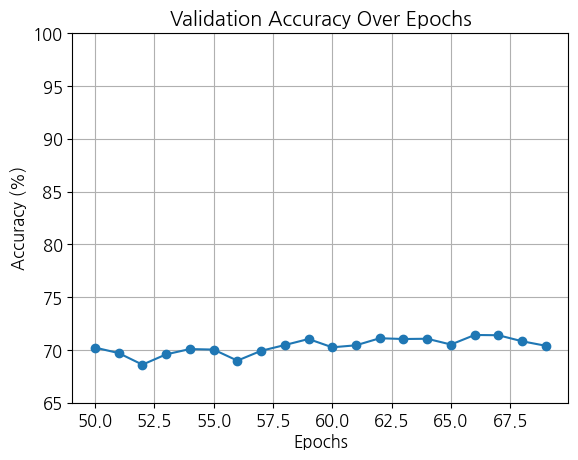

In [ ]:
# 정확도 저장용 리스트
accuracy_list = []
# 이어서 학습할 에폭 수
additional_epochs = 20
# 모델을 저장하는 epoch주기
save_epochs = 1
# 검증 주기
validation_epochs = 1
# Training loop (이어서 학습)
for epoch in range(epochs, epochs + additional_epochs):
    resnet18.train()
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 500 == 499:
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

    # 모델 저장 (필요한 경우)
    if (epoch + 1) % save_epochs == 0:
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': resnet18.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss,
        }
        torch.save(checkpoint, model_save_path)

   # Initialize misclassified_examples list before the loop
    misclassified_examples = []

# 검증 데이터셋을 이용하여 accuracy를 계산하고 출력
    if epoch % validation_epochs == 0:
        resnet18.eval()  # 모델을 평가 모드로 전환
        correct = 0
        total = 0

        with torch.no_grad():
            for data in val_loader:
                inputs, labels = data[0].to(device), data[1].to(device)
                outputs = resnet18(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
           # 잘못 분류된 경우 확인

            misclassified_mask = predicted != labels
            misclassified_examples.extend([(inputs[i], predicted[i].item(), labels[i].item()) for i, is_misclassified in enumerate(misclassified_mask) if is_misclassified])


        accuracy = 100 * correct / total
        accuracy_list.append(accuracy)  # accuracy 리스트에 추가
        print(f'Validation Accuracy after {epoch+1} epochs: {accuracy:.2f}%')

        resnet18.train()  # 모델을 다시 학습 모드로 전환

print('Continued Training Finished')

# 에폭별 accuracy 시각화
plt.plot(range(epochs + 1, epochs + additional_epochs + 1), accuracy_list, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Validation Accuracy Over Epochs')
plt.grid(True)
plt.ylim(65, 100)
plt.show()

In [ ]:
num_epochs = 50 #총 학습할 에폭 수
# Validation
resnet18.eval()  # 평가 모드로 설정
correct = 0
total = 0

# 각 클래스별 정확도를 저장하기 위한 리스트 초기화
class_correct = [0] * len(menu_folders)
class_total = [0] * len(menu_folders)

# 맞춘 이미지와 못 맞춘 이미지를 저장하기 위한 리스트 초기화
correct_samples = []
incorrect_samples = []

with torch.no_grad():
    for data in valloader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = resnet18(inputs)
        _, predicted = torch.max(outputs, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # 각 클래스별로 정확도 계산
        for i in range(len(labels)):
            label = labels[i].item()
            class_correct[label] += (predicted[i] == label).item()
            class_total[label] += 1
            # 맞춘 이미지와 못 맞춘 이미지를 분류
            if predicted[i] == label:
                correct_samples.append((inputs[i], label))
            else:
                incorrect_samples.append((inputs[i], label, predicted[i]))

accuracy = 100 * correct / total

# 현재 epoch 결과 출력
print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss/len(trainloader):.4f}, Accuracy: {accuracy:.2f}%')
print(f'Validation Accuracy: {accuracy:.2f}%')

# 각 클래스별 정확도 출력
for i, folder in enumerate(menu_folders):
    class_acc = 100 * class_correct[i] / class_total[i]
    print(f'Accuracy for class: {folder} is {class_acc:.2f}%')

num_images_per_folder = 3  # 각 폴더에서 출력할 이미지 수
# 맞춘 이미지와 못 맞춘 이미지 출력
# 맞춘 이미지 출력
'''
for i, (input, true_label) in enumerate(incorrect_sample):
    input_cpu = input.cpu()  # 이미지를 CPU로 복사
    print(f'Sample {i + 1}: Correctly predicted - True label: {menu_folders[true_label]}')
    imshow(input_cpu)  # CPU 이미지 출력
'''

for folder_index, folder_name in enumerate(menu_folders):
    # 각 폴더에 대해 출력할 이미지 선택
    folder_images = [(input, true_label, predicted_label) for input, true_label, predicted_label in incorrect_samples if true_label == folder_index]
    num_images_to_display = min(num_images_per_folder, len(folder_images))  # 폴더에서 출력할 이미지 수 선택

    for i, (input, true_label, predicted_label) in enumerate(folder_images[:num_images_to_display]):
        input_cpu = input.cpu()
        print(f'Sample {i + 1}: Incorrectly predicted - True label: {menu_folders[true_label]}, Predicted label: {menu_folders[predicted_label]}')
        imshow(input_cpu)  # CPU 이미지 출력

print('Finished Training')
